# Forest Cover Classification Portfolio Project: Attempt 5

In  previous models, we created a model with three network layers between the input and output layers. These had 128, 64, and 32 neurons, respectively. This improved the performance compared to the first attempt.

In the third go, we added another layer of 128 neurons after the input layer and also added dropout layers. That didn't work as well, in terms of all the metrics we used, compared to the second version of the network.

So this time we'll remove the dropout layers, but add a Dense layer and keep the number of epochs the same (200).

We'll also increase batch size when training this model.

Let's see how it goes...


In [1]:
# Doing the same task, yet again, but this time tweaking hyperparameters and neural net to try to improve accuracy and reduce loss
# Load the data...
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('cover_data.csv')
features = dataset.iloc[:,0:-1]
labels = dataset.iloc[:,-1]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42, stratify=labels)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

stan_scaler = StandardScaler()

features_train_normalized = stan_scaler.fit_transform(features_train)
features_test_normalized = stan_scaler.transform(features_test)

ct = ColumnTransformer([('numeric', StandardScaler(), ["Elevation", "Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])])

features_train_scale = ct.fit_transform(features_train)
features_test_scale = ct.transform(features_test)

In [3]:
# Build the model
# This time, adding an extra Dense layer of 128 neurons and adding dropout layers between them
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, InputLayer
import os
# Turn off GPU usage for tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

model = keras.Sequential()
model.add(InputLayer(input_shape=(features_train_scale.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
Total params: 46,312
Trainable params: 46,312
Non-trainable params: 0
_________________________________________________________________


In [5]:
import time

NUM_EPOCHS = 200
BATCH_SIZE = 2048

s = time.perf_counter()

history = model.fit(features_train_scale, labels_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1)

elapsed = time.perf_counter() - s
print("Elapsed Time: " + str(elapsed) + " seconds")

Epoch 1/200
172/172 [==============================] - 2s 8ms/step - loss: 0.8320 - accuracy: 0.6744 - val_loss: 0.6497 - val_accuracy: 0.7194
Epoch 2/200
172/172 [==============================] - 1s 7ms/step - loss: 0.6279 - accuracy: 0.7276 - val_loss: 0.6093 - val_accuracy: 0.7343
Epoch 3/200
172/172 [==============================] - 1s 7ms/step - loss: 0.5907 - accuracy: 0.7441 - val_loss: 0.5889 - val_accuracy: 0.7423
Epoch 4/200
172/172 [==============================] - 1s 7ms/step - loss: 0.5631 - accuracy: 0.7577 - val_loss: 0.5565 - val_accuracy: 0.7596
Epoch 5/200
172/172 [==============================] - 1s 7ms/step - loss: 0.5430 - accuracy: 0.7677 - val_loss: 0.5291 - val_accuracy: 0.7735
Epoch 6/200
172/172 [==============================] - 1s 7ms/step - loss: 0.5205 - accuracy: 0.7790 - val_loss: 0.5153 - val_accuracy: 0.7803
Epoch 7/200
172/172 [==============================] - 1s 7ms/step - loss: 0.5055 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7831

Epoch 58/200
172/172 [==============================] - 1s 7ms/step - loss: 0.3067 - accuracy: 0.8748 - val_loss: 0.3567 - val_accuracy: 0.8534
Epoch 59/200
172/172 [==============================] - 1s 7ms/step - loss: 0.3114 - accuracy: 0.8726 - val_loss: 0.3748 - val_accuracy: 0.8437
Epoch 60/200
172/172 [==============================] - 1s 7ms/step - loss: 0.3073 - accuracy: 0.8744 - val_loss: 0.3387 - val_accuracy: 0.8603
Epoch 61/200
172/172 [==============================] - 1s 8ms/step - loss: 0.3019 - accuracy: 0.8770 - val_loss: 0.3419 - val_accuracy: 0.8608
Epoch 62/200
172/172 [==============================] - 1s 8ms/step - loss: 0.3016 - accuracy: 0.8771 - val_loss: 0.3301 - val_accuracy: 0.8652
Epoch 63/200
172/172 [==============================] - 1s 8ms/step - loss: 0.3029 - accuracy: 0.8769 - val_loss: 0.3326 - val_accuracy: 0.8626
Epoch 64/200
172/172 [==============================] - 1s 7ms/step - loss: 0.2999 - accuracy: 0.8775 - val_loss: 0.3333 - val_accuracy:

Epoch 115/200
172/172 [==============================] - 1s 7ms/step - loss: 0.2571 - accuracy: 0.8959 - val_loss: 0.3131 - val_accuracy: 0.8732
Epoch 116/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2572 - accuracy: 0.8958 - val_loss: 0.3303 - val_accuracy: 0.8678
Epoch 117/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2548 - accuracy: 0.8974 - val_loss: 0.3217 - val_accuracy: 0.8697
Epoch 118/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2530 - accuracy: 0.8980 - val_loss: 0.3028 - val_accuracy: 0.8786
Epoch 119/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2512 - accuracy: 0.8989 - val_loss: 0.2933 - val_accuracy: 0.8811
Epoch 120/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2504 - accuracy: 0.8995 - val_loss: 0.3441 - val_accuracy: 0.8643
Epoch 121/200
172/172 [==============================] - 2s 9ms/step - loss: 0.2526 - accuracy: 0.8982 - val_loss: 0.2928 - val_ac

172/172 [==============================] - 1s 8ms/step - loss: 0.2308 - accuracy: 0.9065 - val_loss: 0.3106 - val_accuracy: 0.8764
Epoch 172/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2252 - accuracy: 0.9094 - val_loss: 0.2741 - val_accuracy: 0.8912
Epoch 173/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2243 - accuracy: 0.9099 - val_loss: 0.2710 - val_accuracy: 0.8922
Epoch 174/200
172/172 [==============================] - 2s 9ms/step - loss: 0.2244 - accuracy: 0.9103 - val_loss: 0.2688 - val_accuracy: 0.8924
Epoch 175/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2250 - accuracy: 0.9094 - val_loss: 0.2868 - val_accuracy: 0.8846
Epoch 176/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2247 - accuracy: 0.9099 - val_loss: 0.2808 - val_accuracy: 0.8894
Epoch 177/200
172/172 [==============================] - 1s 8ms/step - loss: 0.2278 - accuracy: 0.9081 - val_loss: 0.2951 - val_accuracy: 0.8849

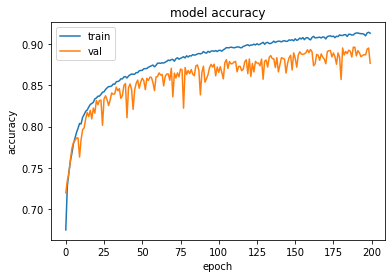

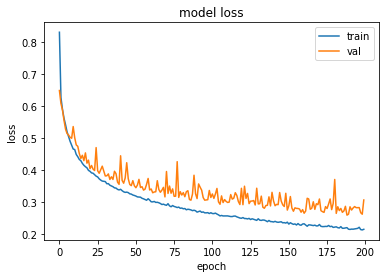

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

score = model.evaluate(features_test_scale, labels_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

prediction = model.predict(features_test_scale)
prediction = np.argmax(prediction, axis=1)

class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(labels_test, prediction, target_names=class_names))

Test loss: 0.30013084411621094
Test accuracy: 0.8801151514053345
5992/5992 [==============================] - 6s 952us/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.95      0.79      0.86     69907
   Lodgepole Pine       0.85      0.96      0.90     93489
   Ponderosa Pine       0.83      0.93      0.88     11799
Cottonwood/Willow       0.83      0.77      0.80       907
            Aspen       0.83      0.66      0.73      3133
      Douglas-fir       0.84      0.71      0.77      5731
        Krummholz       0.90      0.90      0.90      6768

         accuracy                           0.88    191734
        macro avg       0.86      0.82      0.83    191734
     weighted avg       0.89      0.88      0.88    191734



In [8]:
prediction = np.argmax(model.predict(features_test_scale), axis=1)

5992/5992 [==============================] - 7s 1ms/step


[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

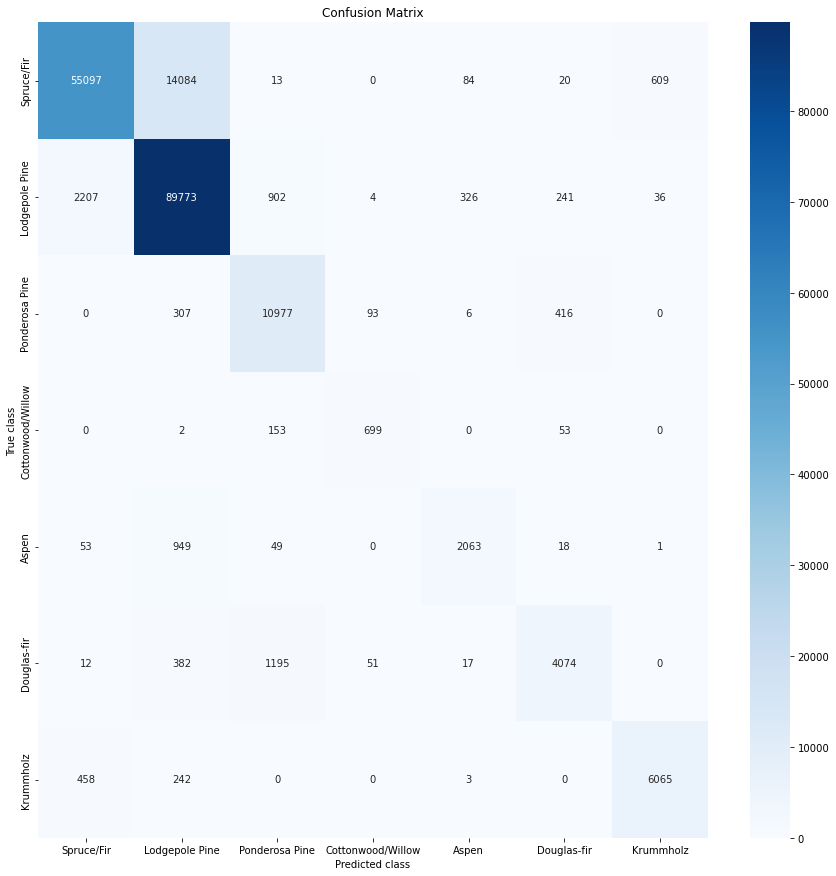

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(labels_test, prediction)
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

## Observations

This model included 4 layers, with 256, 128, 64, and 32 neurons. Regularization or dropout layers weren't used.

Generally, accuracy, precision, recall, and f1 score were high, but did not improve (in fact they dropped very slightly.)

Precision, recall, and f1 score were still often above 0.9 for most classes; however, all three recall and f1 were quite low for the 'Aspen' and 'Willow' classes in particular.

One other interesting thing that we can observe is that  was quite The jumpy/erratic loss and accuracy on the validation set still remained, and was actually worse compared to the previous model. Using a larger batch size did not improve the model training.

Given that the model was larger, with more layers and more neurons, the model took slightly longer to train: training took approx. 4.5 mins. This was quicker than last time.

In the next models, we'll reduce the batch size back to 1024.
